In [ ]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# function to generate spectrogram image from audio file
def generate_spectrogram(audio_path, output_dir):
    y, sr = librosa.load(audio_path, sr=22050) # load audio file
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000) # generate spectrogram
    S_dB = librosa.power_to_db(S, ref=np.max) # convert to dB scale
    plt.figure(figsize=(2.56, 2.56), dpi=100) # set image size
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', fmax=8000) # plot spectrogram
    plt.axis('off') # remove axis labels
    plt.savefig(os.path.join(output_dir, os.path.splitext(os.path.basename(audio_path))[0] + '.png'), bbox_inches='tight', pad_inches=0) # save image
    plt.close() # close plot

# input_dir = 'Split_Files'
# output_dir = 'PNGs'

# # get list of subdirectories in input directory
# class_names = [f.name for f in os.scandir(input_dir) if f.is_dir()]

# # create output directories for each class
# for class_name in class_names:
#     os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)

# # generate spectrograms for each class
# for class_name in class_names:
#     class_dir = os.path.join(input_dir, class_name)
#     output_class_dir = os.path.join(output_dir, class_name)
#     print(class_name)
#     for filename in os.listdir(class_dir):
#         if filename.endswith('.wav'):
#             audio_path = os.path.join(class_dir, filename)
#             generate_spectrogram(audio_path, output_class_dir)

In [ ]:
# define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 431, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# compile model
from keras import optimizers
from keras.losses import CategoricalCrossentropy
model.compile(optimizer=optimizers.Adam(),
              loss=CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


# train model on spectrogram images

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(
    'PNGs',
    target_size=(128, 431),
    batch_size=32,
    class_mode='categorical',  # change to categorical for multiple classes
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    'PNGs',
    target_size=(128, 431),
    batch_size=32,
    class_mode='categorical',  # change to categorical for multiple classes
    subset='validation'
)
# model.fit(
#     train_generator,
#     epochs=10,
#     validation_data=validation_generator
# )

Found 5269 images belonging to 9 classes.
Found 1313 images belonging to 9 classes.


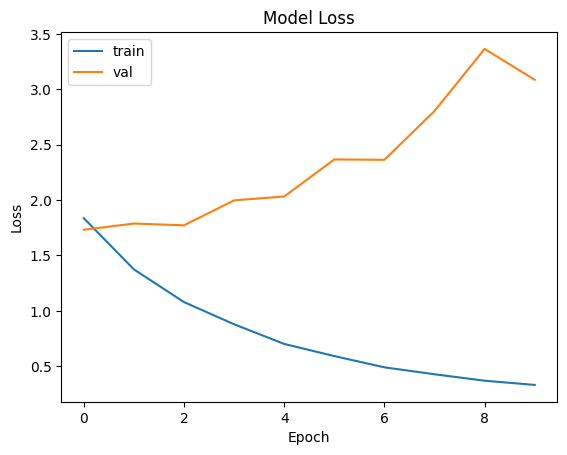

AttributeError: module 'matplotlib' has no attribute 'pyplot'

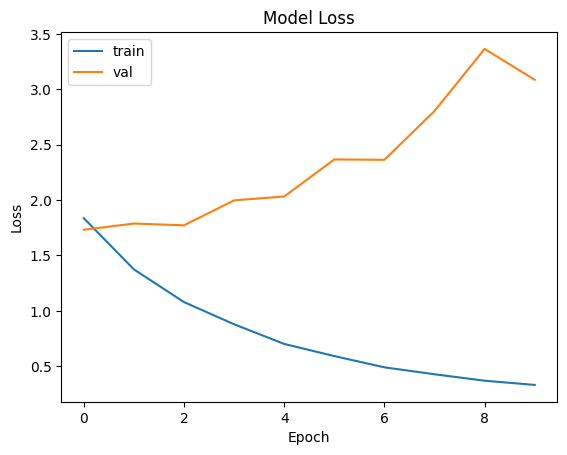

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
import matplotlib.pyplot as plt

# plot training and validation accuracy curves
# plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

# plot training and validation loss curves
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'hindi.wav.png'

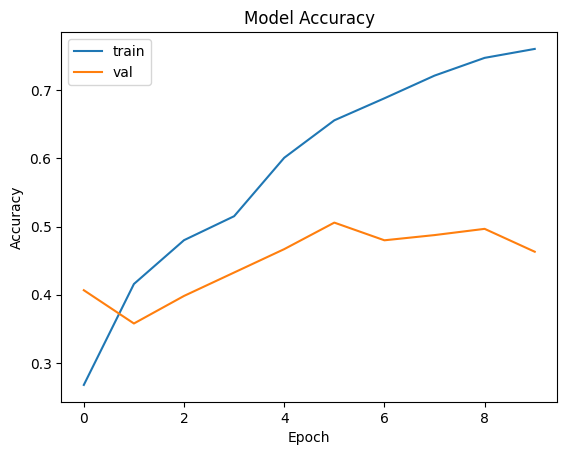

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
# function to predict class of audio sample
def predict_class(audio_path):
    generate_spectrogram(audio_path,'') # generate spectrogram image
    img = tf.keras.preprocessing.image.load_img(audio_path + '.png', target_size=(128, 431)) # load image

# predict class of new audio sample
audio_path = 'hindi.wav'
predict_class(audio_path)

In [ ]:
class_names = [f.name for f in os.scandir('PNGs') if f.is_dir()]
img = tf.keras.preprocessing.image.load_img('hindi.png', target_size=(128, 431))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0 # convert image to array and normalize
img_array = np.expand_dims(img_array, axis=0) # add batch dimension
probabilities = model.predict(img_array)[0] # predict probabilities for each class
predicted_class_idx = np.argmax(probabilities)
predicted_class = class_names[predicted_class_idx] # extract predicted class index
for i in range(len(class_names)):
    print(f"{class_names[i]}: {probabilities[i]}")
print("Predicted Class: ", predicted_class)

1/1 [==============================] - 0s 32ms/step
Hi_En_Split: 0.00037341631832532585
Hi_Hi_Split: 0.34686771035194397
Ka_En_Split: 1.534765942778904e-05
Ka_Ka_Split: 0.0028845169581472874
Ma_En_Split: 0.3178820312023163
Ma_Ma_Split: 0.29980459809303284
Ta_Ta_Split: 0.00031416749698109925
Te_En_Split: 0.03185715526342392
Te_Te_Split: 9.515713941254944e-07
Predicted Class:  Hi_Hi_Split


In [ ]:
from keras.models import Model

feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

train_features = feature_extractor.predict(train_generator)
val_features = feature_extractor.predict(validation_generator)
np.save("train_features.npy", train_features)
np.save("val_features.npy", val_features)

42/42 [==============================] - 13s 306ms/step


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
custom_labels = [f.name for f in os.scandir('PNGs') if f.is_dir()]

# use the extracted features for classification using kNN classifier
knn = KNeighborsClassifier()
knn.fit(train_features, train_generator.labels)
knn_score = knn.score(val_features, validation_generator.labels)
y_pred1 = knn.predict(val_features)

# print the classification report with custom labels
print("kNN classifier score: ", knn_score)
print(classification_report(validation_generator.labels, y_pred1, target_names=custom_labels))


kNN classifier score:  0.13023610053313023
              precision    recall  f1-score   support

 Hi_En_Split       0.11      0.17      0.13       141
 Hi_Hi_Split       0.14      0.24      0.17       211
 Ka_En_Split       0.00      0.00      0.00        25
 Ka_Ka_Split       0.17      0.20      0.19       239
 Ma_En_Split       0.00      0.00      0.00        49
 Ma_Ma_Split       0.07      0.05      0.06       157
 Ta_Ta_Split       0.13      0.09      0.10       199
 Te_En_Split       0.03      0.01      0.01       101
 Te_Te_Split       0.16      0.12      0.13       191

    accuracy                           0.13      1313
   macro avg       0.09      0.10      0.09      1313
weighted avg       0.12      0.13      0.12      1313



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_features, train_generator.labels)
dtc_score = dtc.score(val_features, validation_generator.labels)
y_pred2 = dtc.predict(val_features)
print("Decision tree classifier score: ", dtc_score)
print(classification_report(validation_generator.labels,y_pred2, target_names=custom_labels ))

Decision tree classifier score:  0.12490479817212491
              precision    recall  f1-score   support

 Hi_En_Split       0.07      0.06      0.07       141
 Hi_Hi_Split       0.19      0.19      0.19       211
 Ka_En_Split       0.00      0.00      0.00        25
 Ka_Ka_Split       0.21      0.22      0.21       239
 Ma_En_Split       0.07      0.08      0.08        49
 Ma_Ma_Split       0.08      0.08      0.08       157
 Ta_Ta_Split       0.13      0.12      0.13       199
 Te_En_Split       0.05      0.05      0.05       101
 Te_Te_Split       0.08      0.09      0.09       191

    accuracy                           0.12      1313
   macro avg       0.10      0.10      0.10      1313
weighted avg       0.12      0.12      0.12      1313



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_generator.labels)

# Evaluate the Random Forest classifier on the validation set
score = rf.score(val_features, validation_generator.labels)
y_pred3 = rf.predict(val_features)
print("Random Forest classifier accuracy:", score)
print(classification_report(validation_generator.labels, y_pred3,target_names=custom_labels ))

Random Forest classifier accuracy: 0.1607006854531607
              precision    recall  f1-score   support

 Hi_En_Split       0.18      0.06      0.09       141
 Hi_Hi_Split       0.15      0.26      0.19       211
 Ka_En_Split       0.00      0.00      0.00        25
 Ka_Ka_Split       0.18      0.35      0.24       239
 Ma_En_Split       0.00      0.00      0.00        49
 Ma_Ma_Split       0.04      0.02      0.03       157
 Ta_Ta_Split       0.17      0.16      0.17       199
 Te_En_Split       0.00      0.00      0.00       101
 Te_Te_Split       0.17      0.15      0.16       191

    accuracy                           0.16      1313
   macro avg       0.10      0.11      0.10      1313
weighted avg       0.13      0.16      0.14      1313



c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
nb = GaussianNB()
nb.fit(train_features, train_generator.labels)
nb_score = nb.score(val_features, validation_generator.labels)
y_pred4 = nb.predict(val_features)
print("Naive bias classifier accuracy:", nb_score)
print(classification_report(validation_generator.labels, y_pred4,target_names=custom_labels))

Naive bias classifier accuracy: 0.037319116527037316
              precision    recall  f1-score   support

 Hi_En_Split       0.00      0.00      0.00       141
 Hi_Hi_Split       0.00      0.00      0.00       211
 Ka_En_Split       0.00      0.00      0.00        25
 Ka_Ka_Split       0.00      0.00      0.00       239
 Ma_En_Split       0.04      1.00      0.07        49
 Ma_Ma_Split       0.00      0.00      0.00       157
 Ta_Ta_Split       0.00      0.00      0.00       199
 Te_En_Split       0.00      0.00      0.00       101
 Te_Te_Split       0.00      0.00      0.00       191

    accuracy                           0.04      1313
   macro avg       0.00      0.11      0.01      1313
weighted avg       0.00      0.04      0.00      1313



c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()
lr.fit(train_features, train_generator.labels)
lr_score = lr.score(val_features, validation_generator.labels)
y_pred5 = lr.predict(val_features)
print("Linear Regressor Accuracy:", lr_score)
mse_lr = mean_squared_error(validation_generator.labels, y_pred5)
print("Mean Squared Error (MSE):", mse_lr)
r2lr = r2_score(validation_generator.labels, y_pred5)
print("R-Squared Score:", r2lr)

Linear Regressor Accuracy: -0.004280105962210845
Mean Squared Error (MSE): 7.188223335986007
R-Squared Score: -0.004280105962210845


In [ ]:
lasso = Lasso()
lasso.fit(train_features, train_generator.labels)
lasso_score = lasso.score(val_features, validation_generator.labels)
y_pred6 = lasso.predict(val_features)
print("Lasso regressor accuracy:", lasso_score)
mse_lasso = mean_squared_error(validation_generator.labels, y_pred6)
print("Mean squared error (MSE):", mse_lasso)
r2lasso = r2_score(validation_generator.labels, y_pred6)
print("R-squared score:", r2lasso)

Lasso regressor accuracy: -1.02049634609358e-06
Mean squared error (MSE): 7.157595404774588
R-squared score: -1.02049634609358e-06


In [ ]:
knnr = KNeighborsRegressor()
knnr.fit(train_features, train_generator.labels)
knnr_score = knnr.score(val_features, validation_generator.labels)
y_pred7 = knnr.predict(val_features)
print("KNN regressor accuracy:", knnr_score)
mse_knnr = mean_squared_error(validation_generator.labels, y_pred7)
print("Mean squared error (MSE):", mse_knnr)
r2knnr = r2_score(validation_generator.labels, y_pred7)
print("R-squared score:", r2knnr)

KNN regressor accuracy: -0.20263294503973484
Mean squared error (MSE): 8.60795125666413
R-squared score: -0.20263294503973484


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(train_features, train_generator.labels)
dtr_score = dtr.score(val_features, validation_generator.labels)
y_pred8 = dtr.predict(val_features)
print("Decision tree regressor accuracy:", dtr_score)
mse_dtr = mean_squared_error(validation_generator.labels, y_pred8)
print("Mean squared error (MSE):", mse_dtr)
r2dtr = r2_score(validation_generator.labels, y_pred8)
print("R-squared score:", r2dtr)

Decision tree regressor accuracy: -1.0270457540281348
Mean squared error (MSE): 14.50875856816451
R-squared score: -1.0270457540281348


In [ ]:
rfr = RandomForestRegressor()
rfr.fit(train_features, train_generator.labels)
rfr_score = rfr.score(val_features, validation_generator.labels)
y_pred9 = rfr.predict(val_features)
print("Random forest regressor accuracy:", rfr_score)
mse_rfr = mean_squared_error(validation_generator.labels, y_pred9)
print("Mean squared error (MSE):", mse_rfr)
r2rfr = r2_score(validation_generator.labels, y_pred9)
print("R-squared score:", r2rfr)

Random forest regressor accuracy: -0.0506981933648214
Mean squared error (MSE): 7.520464886026069
R-squared score: -0.0506981933648214


In [ ]:
abr = AdaBoostRegressor()
abr.fit(train_features, train_generator.labels)
abr_score = abr.score(val_features, validation_generator.labels)
y_pred10 = abr.predict(val_features)
print("Ada boost regressor accuracy:", abr_score)
mse_abr = mean_squared_error(validation_generator.labels, y_pred10)
print("Mean squared error (MSE):", mse_abr)
r2abr = r2_score(validation_generator.labels, y_pred10)
print("R-squared score:", r2abr)

Ada boost regressor accuracy: -0.0011808036717488868
Mean squared error (MSE): 7.166039806791999
R-squared score: -0.0011808036717488868


In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(train_features, train_generator.labels)
gbr_score = gbr.score(val_features, validation_generator.labels)
y_pred11 = gbr.predict(val_features)
print("Gradient boost regressor accuracy:", gbr_score)
mse_gbr = mean_squared_error(validation_generator.labels, y_pred11)
print("Mean squared error (MSE):", mse_gbr)
r2gbr = r2_score(validation_generator.labels, y_pred11)
print("R-squared score:", r2gbr)

Gradient boost regressor accuracy: -0.008821480432552153
Mean squared error (MSE): 7.220728623854755
R-squared score: -0.008821480432552153


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=[early_stop])


Epoch 1/10
165/165 [==============================] - 237s 1s/step - loss: 0.2761 - accuracy: 0.8996 - val_loss: 3.3683 - val_accuracy: 0.5651
Epoch 2/10
165/165 [==============================] - 226s 1s/step - loss: 0.2633 - accuracy: 0.9028 - val_loss: 3.5769 - val_accuracy: 0.5164
Epoch 3/10
165/165 [==============================] - 205s 1s/step - loss: 0.2456 - accuracy: 0.9062 - val_loss: 3.7710 - val_accuracy: 0.5118
Epoch 4/10
165/165 [==============================] - 207s 1s/step - loss: 0.2284 - accuracy: 0.9110 - val_loss: 4.0087 - val_accuracy: 0.5552


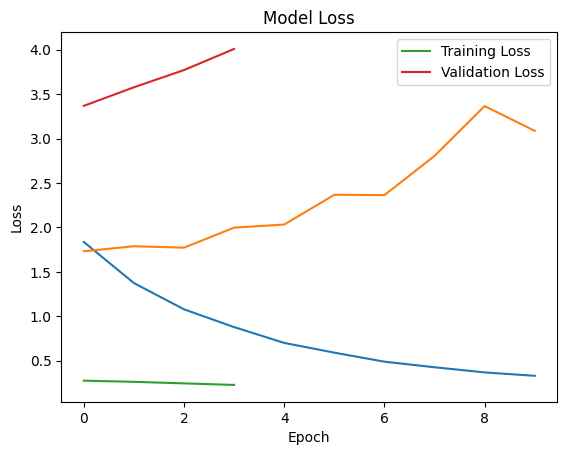

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation accuracy:', val_acc)

42/42 [==============================] - 13s 298ms/step - loss: 4.0087 - accuracy: 0.5552
Validation accuracy: 0.5552170872688293


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen_data_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_data_aug = train_datagen.flow_from_directory(
    'PNGs',
    target_size=(128, 431),
    batch_size=32,
    class_mode='categorical'
)

model.fit_generator(
    train_generator_data_aug,
    steps_per_epoch=100,
    epochs=10
)

Found 6582 images belonging to 9 classes.
Epoch 1/10


C:\Users\chrah\AppData\Local\Temp\ipykernel_17248\4110724996.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


100/100 [==============================] - 114s 1s/step - loss: 0.5954 - accuracy: 0.8138
Epoch 2/10
100/100 [==============================] - 117s 1s/step - loss: 0.5065 - accuracy: 0.8291
Epoch 3/10
100/100 [==============================] - 117s 1s/step - loss: 0.4168 - accuracy: 0.8616
Epoch 4/10
100/100 [==============================] - 117s 1s/step - loss: 0.3709 - accuracy: 0.8790
Epoch 5/10
100/100 [==============================] - 114s 1s/step - loss: 0.3449 - accuracy: 0.8819
Epoch 6/10
100/100 [==============================] - 116s 1s/step - loss: 0.2901 - accuracy: 0.8978
Epoch 7/10
100/100 [==============================] - 124s 1s/step - loss: 0.3030 - accuracy: 0.8918
Epoch 8/10
100/100 [==============================] - 121s 1s/step - loss: 0.2661 - accuracy: 0.9050
Epoch 9/10
100/100 [==============================] - 137s 1s/step - loss: 0.2566 - accuracy: 0.9060
Epoch 10/10
100/100 [==============================] - 143s 1s/step - loss: 0.2260 - accuracy: 0.9241


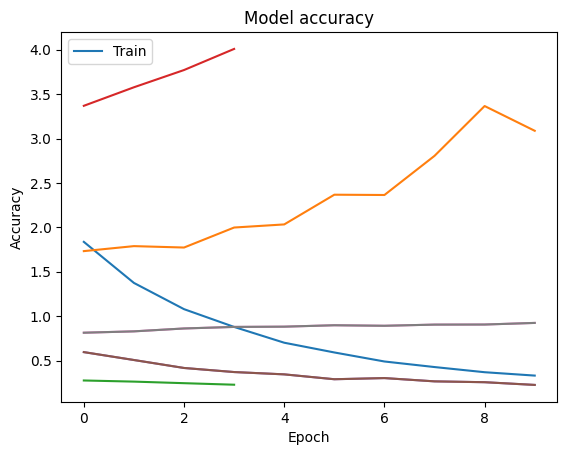

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

Final Model - Optimised

In [ ]:
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.losses import CategoricalCrossentropy

# define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 431, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# compile the model
model.compile(optimizer=optimizers.Adamax(),
              loss=CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# fit the model with early stopping and L2 regularization
history = model.fit(train_generator, epochs=10, validation_data= validation_generator, callbacks=[early_stop])

# # plot training and validation accuracy
# plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/10
  6/165 [>.............................] - ETA: 2:31 - loss: 3.3355 - accuracy: 0.1250

KeyboardInterrupt: 

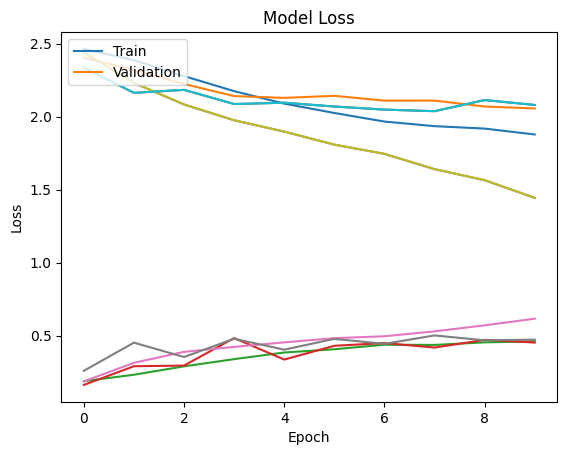

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
import matplotlib.pyplot as pl
pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])
pl.title('Model Loss')
pl.ylabel('Loss')
pl.xlabel('Epoch')
pl.legend(['Train', 'Validation'], loc='upper left')
pl.show()

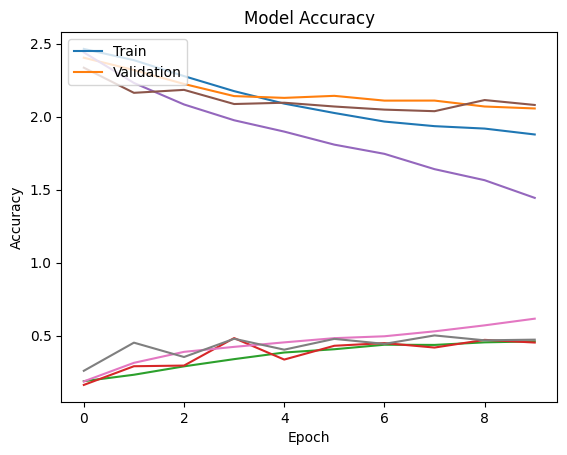

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
# plot training and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import os

# Make predictions on new data
predictions = model.predict(validation_generator)

# Convert predictions to binary values
predictions_binary = np.argmax(predictions, axis=1)

# Get the list of class names
class_names = [f.name for f in os.scandir('PNGs') if f.is_dir()]

# Calculate precision, recall, and F-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(validation_generator.labels, predictions_binary, labels=range(len(class_names)), average=None, zero_division=1)

# Print the results for each class
for i, class_name in enumerate(class_names):
    print('Class {}: Precision: {:.2f}, Recall: {:.2f}, F-score: {:.2f}, Support: {}'.format(class_name, precision[i], recall[i], fscore[i], support[i]))

# Calculate the macro average of precision, recall, and F-score
macro_precision = sum(precision) / len(precision)
macro_recall = sum(recall) / len(recall)
macro_fscore = sum(fscore) / len(fscore)

# Print the macro average
print('Macro Average -- Precision: {:.2f}, Recall: {:.2f}, F-score: {:.2f}'.format(macro_precision, macro_recall, macro_fscore))



42/42 [==============================] - 13s 303ms/step
Class Hi_En_Split: Precision: 0.14, Recall: 0.09, F-score: 0.11, Support: 141
Class Hi_Hi_Split: Precision: 0.14, Recall: 0.27, F-score: 0.19, Support: 211
Class Ka_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 25
Class Ka_Ka_Split: Precision: 0.17, Recall: 0.27, F-score: 0.21, Support: 239
Class Ma_En_Split: Precision: 0.00, Recall: 0.00, F-score: 0.00, Support: 49
Class Ma_Ma_Split: Precision: 0.05, Recall: 0.02, F-score: 0.03, Support: 157
Class Ta_Ta_Split: Precision: 0.12, Recall: 0.07, F-score: 0.09, Support: 199
Class Te_En_Split: Precision: 0.07, Recall: 0.07, F-score: 0.07, Support: 101
Class Te_Te_Split: Precision: 0.23, Recall: 0.24, F-score: 0.24, Support: 191
Macro Average -- Precision: 0.22, Recall: 0.11, F-score: 0.10


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.labels, predictions_binary)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[12 37  0 45  0  7 10  8 22]
 [12 56  0 59  2  9 23 15 35]
 [ 1  9  0 10  0  0  1  2  2]
 [10 81  0 65  2 19 17 19 26]
 [ 4 18  0 12  0  1  7  3  4]
 [14 53  0 52  0  3 10  7 18]
 [ 8 56  0 58  1 11 13 21 31]
 [ 7 30  0 25  0  8 11  7 13]
 [16 47  0 49  0  7 13 13 46]]


AttributeError: module 'matplotlib' has no attribute 'axes'

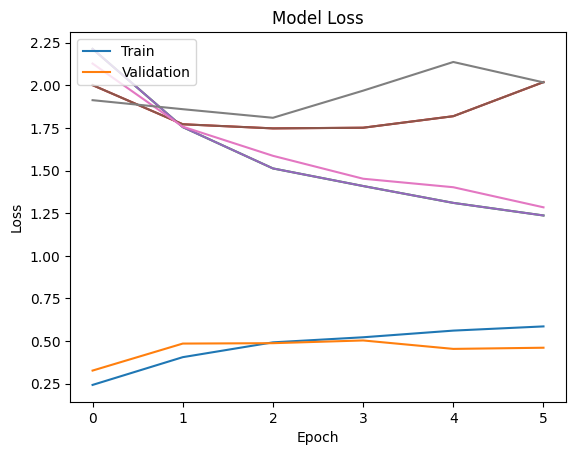

<Figure size 1000x800 with 0 Axes>

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 431, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Add a Reshape layer to add a third dimension to the output of the Dense layer
    tf.keras.layers.Reshape((1, 512)),
    
    # Add a SimpleRNN layer with 64 units
    tf.keras.layers.SimpleRNN(64),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


In [ ]:
test_loss, val_acc = model.evaluate(validation_generator, verbose=2)
print('validation accuracy:', val_acc)

42/42 - 10s - loss: 2.1972 - accuracy: 0.8883 - 10s/epoch - 237ms/step
validation accuracy: 0.8882968425750732


In [ ]:
history = model.fit(train_generator, epochs=10,validation_data= validation_generator)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential_1/dense_3/MatMul/MatMul' defined at (most recent call last):
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\chrah\AppData\Local\Temp\ipykernel_8764\2401507574.py", line 1, in <cell line: 1>
      history = model.fit(train_generator, epochs=10,validation_data= validation_generator)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential_1/dense_3/MatMul/MatMul'
Matrix size-incompatible: In[0]: [32,9], In[1]: [64,1]
	 [[{{node gradient_tape/sequential_1/dense_3/MatMul/MatMul}}]] [Op:__inference_train_function_3506]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import os

# Make predictions on new data
predictions = model.predict(validation_generator)

# Convert predictions to binary values
predictions_binary = np.argmax(predictions, axis=1)

# Get the list of class names
class_names = [f.name for f in os.scandir('PNGs') if f.is_dir()]

# Calculate precision, recall, and F-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(validation_generator.labels, predictions_binary, labels=range(len(class_names)), average=None, zero_division=1)

# Print the results for each class
for i, class_name in enumerate(class_names):
    print('Class {}: Precision: {:.2f}, Recall: {:.2f}, F-score: {:.2f}, Support: {}'.format(class_name, precision[i], recall[i], fscore[i], support[i]))

# Calculate the macro average of precision, recall, and F-score
macro_precision = sum(precision) / len(precision)
macro_recall = sum(recall) / len(recall)
macro_fscore = sum(fscore) / len(fscore)

# Print the macro average
print('Macro Average -- Precision: {:.2f}, Recall: {:.2f}, F-score: {:.2f}'.format(macro_precision, macro_recall, macro_fscore))



42/42 [==============================] - 10s 234ms/step
Class Hi_En_Split: Precision: 0.11, Recall: 1.00, F-score: 0.19, Support: 141
Class Hi_Hi_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 211
Class Ka_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 25
Class Ka_Ka_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 239
Class Ma_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 49
Class Ma_Ma_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 157
Class Ta_Ta_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 199
Class Te_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 101
Class Te_Te_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 191
Macro Average -- Precision: 0.90, Recall: 0.11, F-score: 0.02


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.labels, predictions_binary)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[141   0   0   0   0   0   0   0   0]
 [211   0   0   0   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0   0]
 [239   0   0   0   0   0   0   0   0]
 [ 49   0   0   0   0   0   0   0   0]
 [157   0   0   0   0   0   0   0   0]
 [199   0   0   0   0   0   0   0   0]
 [101   0   0   0   0   0   0   0   0]
 [191   0   0   0   0   0   0   0   0]]


In [ ]:
cm.to_csv('your_output_file_name.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
from matplotlib.figure import Figure
fig = Figure(figsize=(10, 8))
axs = fig.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
plt.savefig('foo.png')

AttributeError: module 'matplotlib' has no attribute 'axes'

RNN Bidirectional


In [ ]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 431, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Add a Reshape layer to add a third dimension to the output of the Dense layer
    tf.keras.layers.Reshape((1, 512)),
    
    # Replace the SimpleRNN layer with a Bidirectional layer
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])



In [ ]:
test_loss, val_acc = model.evaluate(validation_generator, verbose=2)
print('validation accuracy:', val_acc)

42/42 - 10s - loss: 2.1972 - accuracy: 0.8883 - 10s/epoch - 229ms/step
validation accuracy: 0.8882968425750732


In [ ]:
history = model.fit(train_generator, steps_per_epoch=20000//1000, epochs=10, validation_steps=20000//1000,validation_data= validation_generator)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/sequential_4/dense_9/MatMul/MatMul' defined at (most recent call last):
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\chrah\AppData\Local\Temp\ipykernel_8768\3490311646.py", line 1, in <cell line: 1>
      history = model.fit(train_generator, epochs=10, validation_data= validation_generator)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "c:\Users\chrah\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_experimental\optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential_4/dense_9/MatMul/MatMul'
Matrix size-incompatible: In[0]: [32,9], In[1]: [128,1]
	 [[{{node gradient_tape/sequential_4/dense_9/MatMul/MatMul}}]] [Op:__inference_train_function_6672]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import os

# Make predictions on new data
predictions = model.predict(validation_generator)

# Convert predictions to binary values
predictions_binary = np.argmax(predictions, axis=1)

# Get the list of class names
class_names = [f.name for f in os.scandir('PNGs') if f.is_dir()]

# Calculate precision, recall, and F-score for each class
precision, recall, fscore, support = precision_recall_fscore_support(validation_generator.labels, predictions_binary, labels=range(len(class_names)), average=None, zero_division=1)

# Print the results for each class
for i, class_name in enumerate(class_names):
    print('Class {}: Precision: {:.2f}, Recall: {:.2f}, F-score: {:.2f}, Support: {}'.format(class_name, precision[i], recall[i], fscore[i], support[i]))

# Calculate the macro average of precision, recall, and F-score
macro_precision = sum(precision) / len(precision)
macro_recall = sum(recall) / len(recall)
macro_fscore = sum(fscore) / len(fscore)

# Print the macro average
print('Macro Average -- Precision: {:.2f}, Recall: {:.2f}, F-score: {:.2f}'.format(macro_precision, macro_recall, macro_fscore))



42/42 [==============================] - 9s 215ms/step
Class Hi_En_Split: Precision: 0.11, Recall: 1.00, F-score: 0.19, Support: 141
Class Hi_Hi_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 211
Class Ka_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 25
Class Ka_Ka_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 239
Class Ma_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 49
Class Ma_Ma_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 157
Class Ta_Ta_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 199
Class Te_En_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 101
Class Te_Te_Split: Precision: 1.00, Recall: 0.00, F-score: 0.00, Support: 191
Macro Average -- Precision: 0.90, Recall: 0.11, F-score: 0.02


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.labels, predictions_binary)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[141   0   0   0   0   0   0   0   0]
 [211   0   0   0   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0   0]
 [239   0   0   0   0   0   0   0   0]
 [ 49   0   0   0   0   0   0   0   0]
 [157   0   0   0   0   0   0   0   0]
 [199   0   0   0   0   0   0   0   0]
 [101   0   0   0   0   0   0   0   0]
 [191   0   0   0   0   0   0   0   0]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=True, yticklabels=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'axes'

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

AttributeError: module 'matplotlib' has no attribute 'pyplot'